In [192]:
# All needed libraries
import requests
from bs4 import BeautifulSoup as bs
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math

Define a function that returns a beautiful soup from a url

In [193]:
def getSoup(url):
    response = requests.get(url)
    status = response.status_code
    if status == 200:
        page = response.text
        soup = bs(page)
        return soup
    else:
        print(f"Getting url {url} failed with error code {status}")

## Now that there is a function to use for urls, let's make a dataframe out of the top 250 shows

In [194]:
# Use our new function to get the top 250 movies
url = "https://www.imdb.com/chart/toptv?pf_rd_m=A2FGELUUNOQJNL&pf_rd_p=470df400-70d9-4f35-bb05-8646a1195842&pf_rd_r=T0GD5MRQWKHRES4D5GXW&pf_rd_s=right-4&pf_rd_t=15506&pf_rd_i=moviemeter&ref_=chtmvm_ql_6"
top_250_shows = getSoup(url)


In [195]:
# A function that is to be used only for extracting the table data
def get_table_data(soup):
    movie_list = []
    movie_table = soup.find(class_="chart full-width").tbody
    for row in movie_table.find_all('tr'):
        movie_name = row.find(class_="titleColumn").text.strip()
        release_date = row.find(class_= "secondaryInfo").text.strip()
        rating = row.find(class_="ratingColumn imdbRating").text.strip()
        movie_list.append({'title': movie_name, "release_date": release_date, "rating":rating})

    return movie_list

In [196]:
get_table_data(top_250_shows)

[{'title': '1.\n      Planet Earth II\n(2016)',
  'release_date': '(2016)',
  'rating': '9.4'},
 {'title': '2.\n      Breaking Bad\n(2008)',
  'release_date': '(2008)',
  'rating': '9.4'},
 {'title': '3.\n      Planet Earth\n(2006)',
  'release_date': '(2006)',
  'rating': '9.4'},
 {'title': '4.\n      Band of Brothers\n(2001)',
  'release_date': '(2001)',
  'rating': '9.4'},
 {'title': '5.\n      Chernobyl\n(2019)',
  'release_date': '(2019)',
  'rating': '9.3'},
 {'title': '6.\n      The Wire\n(2002)',
  'release_date': '(2002)',
  'rating': '9.3'},
 {'title': '7.\n      Blue Planet II\n(2017)',
  'release_date': '(2017)',
  'rating': '9.2'},
 {'title': '8.\n      Avatar: The Last Airbender\n(2005)',
  'release_date': '(2005)',
  'rating': '9.2'},
 {'title': '9.\n      Cosmos: A Spacetime Odyssey\n(2014)',
  'release_date': '(2014)',
  'rating': '9.2'},
 {'title': '10.\n      The Sopranos\n(1999)',
  'release_date': '(1999)',
  'rating': '9.2'},
 {'title': '11.\n      Cosmos\n(1980)'

In [197]:
top_250_tv_shows_df = pd.DataFrame(get_table_data(top_250_shows))

## Let's get the dataframe for the lowest rated 100 movies

In [198]:
bottom_100_movies = getSoup("https://www.imdb.com/chart/bottom?pf_rd_m=A2FGELUUNOQJNL&pf_rd_p=470df400-70d9-4f35-bb05-8646a1195842&pf_rd_r=FGQKTNKFXN5MT0KR783K&pf_rd_s=right-4&pf_rd_t=15506&pf_rd_i=toptv&ref_=chttvtp_ql_8")

In [199]:
get_table_data(bottom_100_movies)

[{'title': '1.\n      Disaster Movie\n(2008)',
  'release_date': '(2008)',
  'rating': '2.1'},
 {'title': '2.\n      Manos: The Hands of Fate\n(1966)',
  'release_date': '(1966)',
  'rating': '2.2'},
 {'title': '3.\n      Birdemic: Shock and Terror\n(2010)',
  'release_date': '(2010)',
  'rating': '2.3'},
 {'title': '4.\n      Superbabies: Baby Geniuses 2\n(2004)',
  'release_date': '(2004)',
  'rating': '2.3'},
 {'title': '5.\n      The Hottie & the Nottie\n(2008)',
  'release_date': '(2008)',
  'rating': '2.4'},
 {'title': '6.\n      House of the Dead\n(2003)',
  'release_date': '(2003)',
  'rating': '2.5'},
 {'title': '7.\n      Son of the Mask\n(2005)',
  'release_date': '(2005)',
  'rating': '2.5'},
 {'title': "8.\n      Kirk Cameron's Saving Christmas\n(2014)",
  'release_date': '(2014)',
  'rating': '2.5'},
 {'title': '9.\n      Epic Movie\n(2007)',
  'release_date': '(2007)',
  'rating': '2.5'},
 {'title': '10.\n      Battlefield Earth\n(2000)',
  'release_date': '(2000)',
  'r

In [200]:
bottom_100_movies_df = pd.DataFrame(get_table_data(bottom_100_movies))

## Let's make a dataframe of the box office 

In [201]:
box_office = getSoup("https://www.imdb.com/chart/boxoffice?pf_rd_m=A2FGELUUNOQJNL&pf_rd_p=470df400-70d9-4f35-bb05-8646a1195842&pf_rd_r=DF1V4DVZPB185SQ2H2VZ&pf_rd_s=right-4&pf_rd_t=15506&pf_rd_i=top&ref_=chttp_ql_1")

In [202]:
def get_box_office_figures(soup):
    box_office_list = []
    box_office_table = soup.find(class_ = "chart full-width").tbody
    for row in box_office_table.find_all('tr'):
        movie_name = row.find(class_="titleColumn").text.strip()
        weekend_made = row.find(class_="ratingColumn").text.strip()
        gross = row.find(class_="secondaryInfo").text.strip()
        weeks = row.find(class_="weeksColumn").text.strip()
        box_office_list.append({'title': movie_name, "weekend_sales":weekend_made, "gross":gross, "weeks":weeks})

    return box_office_list
    

In [203]:
get_box_office_figures(box_office)

[{'title': 'Black Adam',
  'weekend_sales': '$18.3M',
  'gross': '$137.1M',
  'weeks': '3'},
 {'title': 'Ticket to Paradise',
  'weekend_sales': '$8.5M',
  'gross': '$46.8M',
  'weeks': '3'},
 {'title': 'One Piece Film: Red',
  'weekend_sales': '$7.6M',
  'gross': '$7.6M',
  'weeks': '1'},
 {'title': 'Smile', 'weekend_sales': '$4.0M', 'gross': '$99.1M', 'weeks': '6'},
 {'title': 'Prey for the Devil',
  'weekend_sales': '$3.9M',
  'gross': '$13.7M',
  'weeks': '2'},
 {'title': 'Lyle, Lyle, Crocodile',
  'weekend_sales': '$3.4M',
  'gross': '$36.6M',
  'weeks': '5'},
 {'title': 'The Banshees of Inisherin',
  'weekend_sales': '$2.1M',
  'gross': '$3.1M',
  'weeks': '3'},
 {'title': 'Till', 'weekend_sales': '$1.9M', 'gross': '$6.6M', 'weeks': '4'},
 {'title': 'Halloween Ends',
  'weekend_sales': '$1.4M',
  'gross': '$63.5M',
  'weeks': '4'},
 {'title': 'Terrifier 2',
  'weekend_sales': '$1.1M',
  'gross': '$9.8M',
  'weeks': '5'}]

In [204]:
box_office_df = pd.DataFrame(get_box_office_figures(box_office))

## Let's get the top 250 movies now

In [205]:
top_250_movies = getSoup("https://www.imdb.com/chart/top?pf_rd_m=A2FGELUUNOQJNL&pf_rd_p=470df400-70d9-4f35-bb05-8646a1195842&pf_rd_r=HPN7JM6XWBTH540Z9DFH&pf_rd_s=right-4&pf_rd_t=15506&pf_rd_i=toptv&ref_=chttvtp_ql_3")

In [206]:
get_table_data(top_250_movies)

[{'title': '1.\n      The Shawshank Redemption\n(1994)',
  'release_date': '(1994)',
  'rating': '9.2'},
 {'title': '2.\n      The Godfather\n(1972)',
  'release_date': '(1972)',
  'rating': '9.2'},
 {'title': '3.\n      The Dark Knight\n(2008)',
  'release_date': '(2008)',
  'rating': '9.0'},
 {'title': '4.\n      The Godfather Part II\n(1974)',
  'release_date': '(1974)',
  'rating': '9.0'},
 {'title': '5.\n      12 Angry Men\n(1957)',
  'release_date': '(1957)',
  'rating': '9.0'},
 {'title': "6.\n      Schindler's List\n(1993)",
  'release_date': '(1993)',
  'rating': '8.9'},
 {'title': '7.\n      The Lord of the Rings: The Return of the King\n(2003)',
  'release_date': '(2003)',
  'rating': '8.9'},
 {'title': '8.\n      Pulp Fiction\n(1994)',
  'release_date': '(1994)',
  'rating': '8.8'},
 {'title': '9.\n      The Lord of the Rings: The Fellowship of the Ring\n(2001)',
  'release_date': '(2001)',
  'rating': '8.8'},
 {'title': '10.\n      The Good, the Bad and the Ugly\n(1966)',


In [207]:
top_250_movies_df = pd.DataFrame(get_table_data(top_250_movies))

## Finally, let's get the most popoular movies

In [208]:
most_popular_movies = getSoup("https://www.imdb.com/chart/moviemeter?pf_rd_m=A2FGELUUNOQJNL&pf_rd_p=470df400-70d9-4f35-bb05-8646a1195842&pf_rd_r=KH3W2N9694QC2RZQ1MP1&pf_rd_s=right-4&pf_rd_t=15506&pf_rd_i=top&ref_=chttp_ql_2")

In [209]:
get_table_data(most_popular_movies)

[{'title': 'Barbarian\n(2022)\n1\n(\n\n1)',
  'release_date': '(2022)',
  'rating': '7.1'},
 {'title': 'All Quiet on the Western Front\n(2022)\n2\n(\n\n11)',
  'release_date': '(2022)',
  'rating': '7.9'},
 {'title': 'Terrifier 2\n(2022)\n3\n(no change)',
  'release_date': '(2022)',
  'rating': '6.3'},
 {'title': 'Black Adam\n(2022)\n4\n(\n\n3)',
  'release_date': '(2022)',
  'rating': '7.0'},
 {'title': 'The Good Nurse\n(2022)\n5\n(\n\n1)',
  'release_date': '(2022)',
  'rating': '6.9'},
 {'title': 'Avatar: The Way of Water\n(2022)\n6\n(\n\n33)',
  'release_date': '(2022)',
  'rating': ''},
 {'title': 'Black Panther: Wakanda Forever\n(2022)\n7\n(\n\n1)',
  'release_date': '(2022)',
  'rating': '7.5'},
 {'title': 'Weird: The Al Yankovic Story\n(2022)\n8\n(\n\n217)',
  'release_date': '(2022)',
  'rating': '7.1'},
 {'title': 'Smile\n(2022)\n9\n(\n\n7)',
  'release_date': '(2022)',
  'rating': '6.8'},
 {'title': 'Enola Holmes 2\n(2022)\n10\n(\n\n144)',
  'release_date': '(2022)',
  'rati

In [210]:
most_popular_movies_df = pd.DataFrame(get_table_data(most_popular_movies))

# All Webscraping is now complete, time for cleaning and analysis

In [211]:
box_office_df

,title,weekend_sales,gross,weeks
0,Black Adam,$18.3M,$137.1M,3
1,Ticket to Paradise,$8.5M,$46.8M,3
2,One Piece Film: Red,$7.6M,$7.6M,1
3,Smile,$4.0M,$99.1M,6
4,Prey for the Devil,$3.9M,$13.7M,2
5,"Lyle, Lyle, Crocodile",$3.4M,$36.6M,5
6,The Banshees of Inisherin,$2.1M,$3.1M,3
7,Till,$1.9M,$6.6M,4
8,Halloween Ends,$1.4M,$63.5M,4
9,Terrifier 2,$1.1M,$9.8M,5


In [212]:
"""
Let's remove all of the bad characters from the weekend_sales and gross columns for easy manipulation later
"""
bad_chars = ["$", "M"]
for index, row in box_office_df.iterrows():
    row['weekend_sales'] = ''.join(filter(lambda i: i not in bad_chars, row['weekend_sales']))
    row['gross'] = ''.join(filter(lambda i: i not in bad_chars, row['gross']))
box_office_df

,title,weekend_sales,gross,weeks
0,Black Adam,18.3,137.1,3
1,Ticket to Paradise,8.5,46.8,3
2,One Piece Film: Red,7.6,7.6,1
3,Smile,4.0,99.1,6
4,Prey for the Devil,3.9,13.7,2
5,"Lyle, Lyle, Crocodile",3.4,36.6,5
6,The Banshees of Inisherin,2.1,3.1,3
7,Till,1.9,6.6,4
8,Halloween Ends,1.4,63.5,4
9,Terrifier 2,1.1,9.8,5


In [213]:
most_popular_movies_df

,title,release_date,rating
0,Barbarian\n(2022)\n1\n(\n\n1),(2022),7.1
1,All Quiet on the Western Front\n(2022)\n2\n(\n...,(2022),7.9
2,Terrifier 2\n(2022)\n3\n(no change),(2022),6.3
3,Black Adam\n(2022)\n4\n(\n\n3),(2022),7.0
4,The Good Nurse\n(2022)\n5\n(\n\n1),(2022),6.9
...,...,...,...
95,Till\n(2022)\n96\n(\n\n13),(2022),7.6
96,The Godfather\n(1972)\n97\n(\n\n20),(1972),9.2
97,Morbius\n(2022)\n98\n(\n\n79),(2022),5.2
98,The Lord of the Rings: The Fellowship of the R...,(2001),8.8


In [214]:
"""
Let's remove all of the bad characters in the other data frames. Unlike the box office, these all have the same issues, so let's create a function to do them all at once
"""
def remove_bad_chars(df):
    bad_chars_not_date = ['(',')', '\n','1', '2','3','4','5','6','7','8','9','0', '.']
    bad_chars_date = ['(',')']
    for index, row in df.iterrows():
        row['title'] = ''.join(filter(lambda i: i not in bad_chars_not_date, row['title']))
        row['release_date'] = ''.join(filter(lambda i: i not in bad_chars_date, row['release_date']))



In [215]:
# Clean the most popular movies
remove_bad_chars(most_popular_movies_df)
most_popular_movies_df

,title,release_date,rating
0,Barbarian,2022,7.1
1,All Quiet on the Western Front,2022,7.9
2,Terrifier no change,2022,6.3
3,Black Adam,2022,7.0
4,The Good Nurse,2022,6.9
...,...,...,...
95,Till,2022,7.6
96,The Godfather,1972,9.2
97,Morbius,2022,5.2
98,The Lord of the Rings: The Fellowship of the Ring,2001,8.8


In [216]:
# Clean the top 250 movies
remove_bad_chars(top_250_movies_df)
top_250_movies_df

,title,release_date,rating
0,The Shawshank Redemption,1994,9.2
1,The Godfather,1972,9.2
2,The Dark Knight,2008,9.0
3,The Godfather Part II,1974,9.0
4,Angry Men,1957,9.0
...,...,...,...
245,Dersu Uzala,1975,8.0
246,Aladdin,1992,8.0
247,The Help,2011,8.0
248,Gandhi,1982,8.0


In [217]:
# Clean the top 250 shows
remove_bad_chars(top_250_tv_shows_df)
top_250_tv_shows_df

,title,release_date,rating
0,Planet Earth II,2016,9.4
1,Breaking Bad,2008,9.4
2,Planet Earth,2006,9.4
3,Band of Brothers,2001,9.4
4,Chernobyl,2019,9.3
...,...,...,...
245,X-Men: The Animated Series,1992,8.4
246,Derry Girls,2018,8.4
247,Content Cop,2015,8.4
248,Foyle's War,2002,8.4


In [218]:
# Clean the bottom 100 movies
remove_bad_chars(bottom_100_movies_df)
bottom_100_movies_df

,title,release_date,rating
0,Disaster Movie,2008,2.1
1,Manos: The Hands of Fate,1966,2.2
2,Birdemic: Shock and Terror,2010,2.3
3,Superbabies: Baby Geniuses,2004,2.3
4,The Hottie & the Nottie,2008,2.4
...,...,...,...
95,Stan Helsing,2009,4.0
96,The Human Centipede Full Sequence,2011,4.0
97,Speed : Cruise Control,1997,4.0
98,Ballistic: Ecks vs Sever,2002,4.0


## All Data is now clean and ready for analysis

### Now let's answer the first question, "Is there a trend for how many top 250 shows are being released per year?"

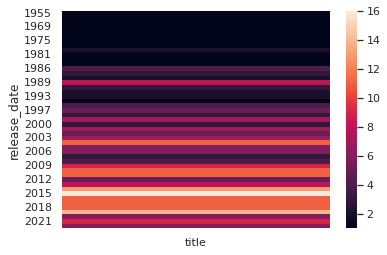

In [219]:
grouped_year = top_250_tv_shows_df.groupby("release_date").agg({'title':'count'})
sns.heatmap(grouped_year, cbar = True, annot=False)
plt.xlabel = ''
plt.ylabel = "Year Released"
plt.title = "Number of top 250 movies released per year"


As we can see in the heatmap, there is a trend with the number of top 250 tv shows released per year. The intensity of the heatmap increases as we get closer to the modern era. Interestingly, we can see that there is seeming to be a bit of a falling off around 2021 from the high of top 250 tv shows released in 2015-2018. It would be interesting to see if this trend continues.

### Let's explore the second question, "What is the average rating of a bottom 100 movie? What is the top rated bottom 100 movie, and the lowest rated bottom 100 movie?"

In [220]:
count = 0
sum = 0
max = 0
min = 1000
for item in bottom_100_movies_df['rating']:
    item = float(item)
    if item > max:
        max = item
    if item < min:
        min = item
    sum += item
    count += 1

print(f"The mean score for a bottom 100 movie is {(sum/count)}")
print(f"The maximum score of a bottom 100 movie is {max}")
print(f"The minimum score of a bottom 100 movie is {min}")

The mean score for a bottom 100 movie is 3.4359999999999964
The maximum score of a bottom 100 movie is 4.0
The minimum score of a bottom 100 movie is 2.1


### Let's explore the third question, "What is the distribution of ratings for the top 250 movies?"

Text(0.5, 1.0, 'Distribution of ratings in the top 250 movies')

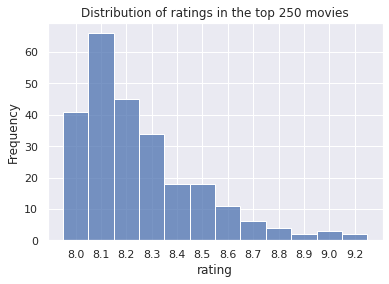

In [221]:
rslt = top_250_movies_df.sort_values(['rating'])
rslt
sns.histplot(data = rslt, x = "rating", stat = "frequency").set_title("Distribution of ratings in the top 250 movies")

As is shown in the graph, the ratings of the top 250 movies seem to be clustered around 8.1/8.2. Interestingly, this graph also shows us that there are no movies in the top 250 movies that have a rating below an 8.0. It would also appear that this graph is right-skewed, with a single mode at 8.1. It also shows us that there are very few movies that get a rating of above 9.

### Finally, let's see how the best and worst performers look in the box office for this weekend compared to their gross so far

In [222]:
box_office_df

,title,weekend_sales,gross,weeks
0,Black Adam,18.3,137.1,3
1,Ticket to Paradise,8.5,46.8,3
2,One Piece Film: Red,7.6,7.6,1
3,Smile,4.0,99.1,6
4,Prey for the Devil,3.9,13.7,2
5,"Lyle, Lyle, Crocodile",3.4,36.6,5
6,The Banshees of Inisherin,2.1,3.1,3
7,Till,1.9,6.6,4
8,Halloween Ends,1.4,63.5,4
9,Terrifier 2,1.1,9.8,5


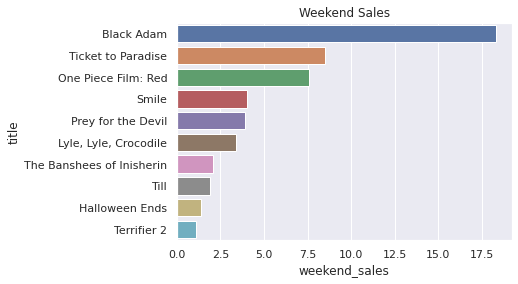

In [223]:
sns.set()
box_office_df['gross'] = pd.to_numeric(box_office_df['gross'])
box_office_df['weekend_sales'] = pd.to_numeric(box_office_df["weekend_sales"])
plot = sns.barplot(data = box_office_df, x = 'weekend_sales', y='title', orient = 'h').set_title("Weekend Sales")

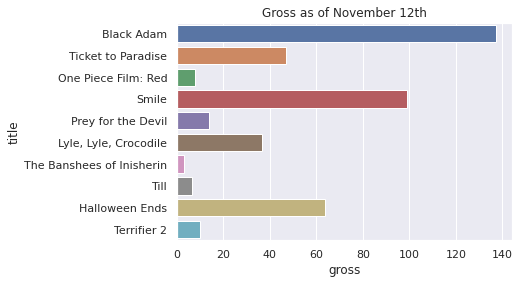

In [224]:
plot2 = sns.barplot(data = box_office_df, x = 'gross', y='title', orient = 'h').set_title("Gross as of November 12th")

As we can see in the two plots, the performance difference between total gross and and weekend performance is different for each movie. Black Adam is consistently in the lead while One Piece Film: Red seem to be outperforming this weekend in particular when compared to how much it's grossed so far. We can also see that movies like Halloween Ends and Smile are not performing well this weekend, which is most likely because they are Halloween themed movies and the Halloween season is over. We can also see that the movie Terrifier 2 has consistently performed poorly in the gross and in the Weekend Sales.